In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('..')

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from plot.band_plot import line_bar_plot

In [4]:
epsilon_values = [0.02, 0.04, 0.06, 0.08, 0.1]

In [5]:
file_dir = '../results/self_distance/epsilon_{}.csv'

In [6]:
df_list = [pd.read_csv(file_dir.format(epsilon)) for epsilon in epsilon_values]

In [7]:
for index, epsilon in enumerate(epsilon_values):
    df_list[index]['epsilon'] = epsilon

In [8]:
df_zero = pd.read_csv('../results/none/epsilon_0.0.csv')
df_zero['epsilon'] = 0.0

In [9]:
df_list.append(df_zero)

In [10]:
concat_df = pd.concat(df_list, axis=0)

In [11]:
concat_df['recall_percentage'] = concat_df['recall_count'] / np.minimum(concat_df['num_possible'], concat_df['k'])

/homes/gws/psturm/miniconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2003: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/homes/gws/psturm/miniconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2004: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


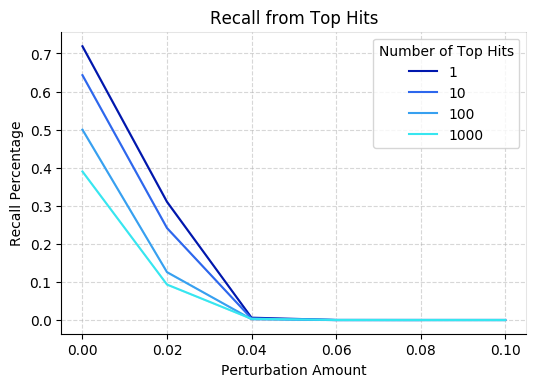

In [39]:
fig, ax = line_bar_plot(x='epsilon',
                        y='recall_percentage',
                        data=concat_df,
                        color_by='k',
                        use_bootstrap=False,
                        color='royalblue',
                        title='Recall from Top Hits',
                        ylabel='Recall Percentage',
                        xlabel='Perturbation Amount',
                        legend_title='Number of Top Hits',
                        colors=['#0017ad',
                                '#2d67ed',
                                '#37a0f0',
                                '#37e6f0'])
plt.savefig('figures/recall_percentage.pdf')

In [35]:
concat_df['discovery_rate'] = (concat_df['recall_count'] > 0).astype(int)

/homes/gws/psturm/miniconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2003: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/homes/gws/psturm/miniconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2004: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


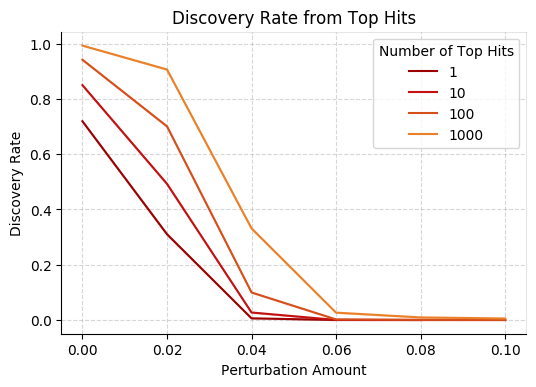

In [40]:
fig, ax = line_bar_plot(x='epsilon',
                        y='discovery_rate',
                        data=concat_df,
                        color_by='k',
                        use_bootstrap=False,
                        color='royalblue',
                        title='Discovery Rate from Top Hits',
                        ylabel='Discovery Rate',
                        xlabel='Perturbation Amount',
                        legend_title='Number of Top Hits',
                        colors=['#9c0000',
                                '#c41010',
                                '#d64f1a',
                                '#eb8028'])
plt.savefig('figures/discovery_rate.pdf')